In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('PSL-2016-2022.csv')

In [3]:
df.tail()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
50257,2022,34,Lahore Qalandars,Multan Sultans,2,19,5,0,2.0,138,9,False,False,True,bowled,Qalandars
50258,2022,34,Lahore Qalandars,Multan Sultans,2,19,6,0,NaN,138,9,False,False,False,NaN,Qalandars
50259,2022,34,Lahore Qalandars,Multan Sultans,2,20,1,0,NaN,138,9,False,False,False,NaN,Qalandars
50260,2022,34,Lahore Qalandars,Multan Sultans,2,20,2,0,NaN,138,9,False,False,False,NaN,Qalandars
50261,2022,34,Lahore Qalandars,Multan Sultans,2,20,3,0,1.0,138,10,False,False,True,caught,Qalandars


In [4]:
df.shape

(50262, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50262 entries, 0 to 50261
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   psl_year      50262 non-null  int64  
 1   match_number  50262 non-null  int64  
 2   team_1        50262 non-null  object 
 3   team_2        50262 non-null  object 
 4   inning        50262 non-null  int64  
 5   over          50262 non-null  int64  
 6   ball          50262 non-null  int64  
 7   runs          50262 non-null  int64  
 8   wicket        2661 non-null   float64
 9   total_runs    50262 non-null  int64  
 10  wickets       50262 non-null  int64  
 11  is_four       50262 non-null  bool   
 12  is_six        50262 non-null  bool   
 13  is_wicket     50262 non-null  bool   
 14  wicket_text   2650 non-null   object 
 15  result        50262 non-null  object 
dtypes: bool(3), float64(1), int64(8), object(4)
memory usage: 5.1+ MB


In [6]:
print("Number of matches in each year")
df.groupby("psl_year")['match_number'].nunique()

Number of matches in each year


psl_year
2016    24
2017    24
2018    33
2019    34
2020    32
2021    34
2022    34
Name: match_number, dtype: int64

In [7]:
df.groupby(["psl_year","wicket_text"])["wicket_text"].count()

psl_year  wicket_text   
2016      bowled             45
          caught            172
          hit wicket          1
          lbw                26
          run out            26
          stumped            10
2017      bowled             48
          caught            191
          lbw                28
          run out            36
          stumped             9
2018      bowled             84
          caught            261
          hit wicket          2
          lbw                32
          run out            31
          stumped             5
2019      bowled             93
          caught            256
          lbw                28
          obstruct field      1
          run out            42
          stumped            10
2020      bowled             58
          caught            267
          lbw                16
          run out            27
          stumped             5
2021      bowled             86
          caught            247
          hit w

In [8]:
df["wicket"].unique()
# Every value of this column represent the wicket 

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.])

In [9]:
df2=df.loc[df["runs"] == 4].groupby(["psl_year"])["runs"].count().reset_index()
df2

,psl_year,runs
0,2016,578
1,2017,565
2,2018,792
3,2019,898
4,2020,884
5,2021,1022
6,2022,1008


<AxesSubplot:xlabel='psl_year', ylabel='runs'>

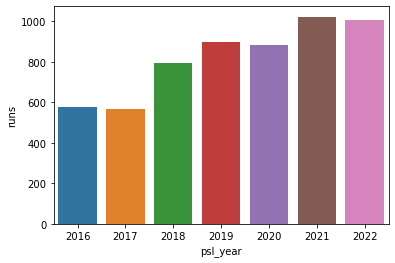

In [10]:
sns.barplot(data=df2, x=df2["psl_year"],y=df2["runs"])

In [11]:
df3=df.loc[df["runs"] == 6].groupby(["psl_year"])["runs"].count().reset_index()
df3

,psl_year,runs
0,2016,246
1,2017,256
2,2018,413
3,2019,374
4,2020,383
5,2021,431
6,2022,434


<AxesSubplot:xlabel='psl_year', ylabel='runs'>

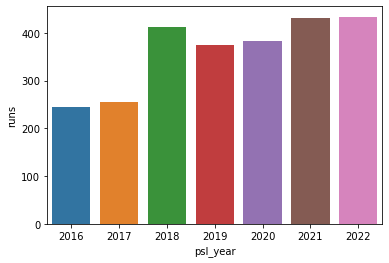

In [12]:
sns.barplot(data=df3, x=df3["psl_year"],y=df3["runs"])

In [13]:
df.isnull().sum()

psl_year            0
match_number        0
team_1              0
team_2              0
inning              0
over                0
ball                0
runs                0
wicket          47601
total_runs          0
wickets             0
is_four             0
is_six              0
is_wicket           0
wicket_text     47612
result              0
dtype: int64

In [14]:
df.sample(5)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
32577,2020,29,Multan Sultans,Lahore Qalandars,1,5,4,0,NaN,24,2,False,False,False,NaN,Qalandars
8219,2017,12,Peshawar Zalmi,Islamabad United,2,17,8,6,NaN,111,4,False,True,False,NaN,United
40315,2021,27,Karachi Kings,Lahore Qalandars,2,20,5,4,NaN,169,7,True,False,False,NaN,Kings
16445,2018,24,Karachi Kings,Lahore Qalandars,2,11,1,1,NaN,83,1,False,False,False,NaN,tied
31319,2020,22,Islamabad United,Multan Sultans,2,5,1,0,NaN,62,0,False,False,False,NaN,Sultans


In [15]:
df["wicket_text"].unique()

array([nan, 'caught', 'bowled', 'lbw', 'run out', 'stumped', 'hit wicket',
       'obstruct field'], dtype=object)

In [16]:
df["wicket_text"].fillna('not out',inplace=True)

In [17]:
df.isnull().sum()

psl_year            0
match_number        0
team_1              0
team_2              0
inning              0
over                0
ball                0
runs                0
wicket          47601
total_runs          0
wickets             0
is_four             0
is_six              0
is_wicket           0
wicket_text         0
result              0
dtype: int64

In [18]:
df["wicket"].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.])

In [19]:
df[df["wicket_text"]=='bowled']

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
48,2016,1,Islamabad United,Quetta Gladiators,1,8,6,0,2.0,28,3,False,False,True,bowled,Gladiators
55,2016,1,Islamabad United,Quetta Gladiators,1,10,1,0,2.0,32,4,False,False,True,bowled,Gladiators
253,2016,2,Lahore Qalandars,Karachi Kings,1,5,6,0,2.0,37,2,False,False,True,bowled,Kings
336,2016,2,Lahore Qalandars,Karachi Kings,1,19,2,0,2.0,117,5,False,False,True,bowled,Kings
346,2016,2,Lahore Qalandars,Karachi Kings,1,20,5,0,2.0,124,8,False,False,True,bowled,Kings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50164,2022,34,Lahore Qalandars,Multan Sultans,2,4,6,0,2.0,36,1,False,False,True,bowled,Qalandars
50189,2022,34,Lahore Qalandars,Multan Sultans,2,8,6,0,2.0,50,4,False,False,True,bowled,Qalandars
50244,2022,34,Lahore Qalandars,Multan Sultans,2,17,5,0,2.0,120,7,False,False,True,bowled,Qalandars
50248,2022,34,Lahore Qalandars,Multan Sultans,2,18,2,0,2.0,122,8,False,False,True,bowled,Qalandars


In [20]:
df.drop(columns=['wicket'],inplace=True)

In [21]:
df.head(60)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators
5,2016,1,Islamabad United,Quetta Gladiators,1,1,6,0,0,0,False,False,False,not out,Gladiators
6,2016,1,Islamabad United,Quetta Gladiators,1,2,1,0,0,0,False,False,False,not out,Gladiators
7,2016,1,Islamabad United,Quetta Gladiators,1,2,2,1,1,0,False,False,False,not out,Gladiators
8,2016,1,Islamabad United,Quetta Gladiators,1,2,3,2,3,0,False,False,False,not out,Gladiators
9,2016,1,Islamabad United,Quetta Gladiators,1,2,4,0,3,0,False,False,False,not out,Gladiators


In [22]:
df.isnull().sum()

psl_year        0
match_number    0
team_1          0
team_2          0
inning          0
over            0
ball            0
runs            0
total_runs      0
wickets         0
is_four         0
is_six          0
is_wicket       0
wicket_text     0
result          0
dtype: int64

In [23]:
 df["wickets_left"]=10-df["wickets"]

In [24]:
df.head(60)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10
5,2016,1,Islamabad United,Quetta Gladiators,1,1,6,0,0,0,False,False,False,not out,Gladiators,10
6,2016,1,Islamabad United,Quetta Gladiators,1,2,1,0,0,0,False,False,False,not out,Gladiators,10
7,2016,1,Islamabad United,Quetta Gladiators,1,2,2,1,1,0,False,False,False,not out,Gladiators,10
8,2016,1,Islamabad United,Quetta Gladiators,1,2,3,2,3,0,False,False,False,not out,Gladiators,10
9,2016,1,Islamabad United,Quetta Gladiators,1,2,4,0,3,0,False,False,False,not out,Gladiators,10


In [25]:
df['balls'] = df['ball'].apply(lambda x: min(x, 6))

In [26]:
df["over_ball"] = df["over"] + (df["balls"]/6)

In [27]:
df[df["ball"] == 10]

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball
9837,2017,19,Quetta Gladiators,Peshawar Zalmi,2,1,10,0,9,0,False,False,False,not out,Zalmi,10,6,2.0
10291,2017,21,Quetta Gladiators,Peshawar Zalmi,2,4,10,1,30,2,False,False,False,not out,Gladiators,8,6,5.0
12872,2018,8,Karachi Kings,Lahore Qalandars,2,2,10,2,23,1,False,False,False,not out,Kings,9,6,3.0
25475,2019,28,Karachi Kings,Quetta Gladiators,2,19,10,4,186,4,True,False,False,not out,Kings,6,6,20.0
36783,2021,12,Quetta Gladiators,Islamabad United,2,17,10,1,157,4,False,False,False,not out,United,6,6,18.0


In [28]:
df["crr"]=df["total_runs"]/df["over_ball"]

In [29]:
df.head(60)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.000000
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.000000
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.000000
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10,4,1.666667,0.000000
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10,5,1.833333,0.000000
5,2016,1,Islamabad United,Quetta Gladiators,1,1,6,0,0,0,False,False,False,not out,Gladiators,10,6,2.000000,0.000000
6,2016,1,Islamabad United,Quetta Gladiators,1,2,1,0,0,0,False,False,False,not out,Gladiators,10,1,2.166667,0.000000
7,2016,1,Islamabad United,Quetta Gladiators,1,2,2,1,1,0,False,False,False,not out,Gladiators,10,2,2.333333,0.428571
8,2016,1,Islamabad United,Quetta Gladiators,1,2,3,2,3,0,False,False,False,not out,Gladiators,10,3,2.500000,1.200000
9,2016,1,Islamabad United,Quetta Gladiators,1,2,4,0,3,0,False,False,False,not out,Gladiators,10,4,2.666667,1.125000


In [30]:
df["one"] = 1

In [31]:
df.loc[df['ball']>6,'one']=0

In [32]:
df[df['ball'] == 10]

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one
9837,2017,19,Quetta Gladiators,Peshawar Zalmi,2,1,10,0,9,0,False,False,False,not out,Zalmi,10,6,2.0,4.500000,0
10291,2017,21,Quetta Gladiators,Peshawar Zalmi,2,4,10,1,30,2,False,False,False,not out,Gladiators,8,6,5.0,6.000000,0
12872,2018,8,Karachi Kings,Lahore Qalandars,2,2,10,2,23,1,False,False,False,not out,Kings,9,6,3.0,7.666667,0
25475,2019,28,Karachi Kings,Quetta Gladiators,2,19,10,4,186,4,True,False,False,not out,Kings,6,6,20.0,9.300000,0
36783,2021,12,Quetta Gladiators,Islamabad United,2,17,10,1,157,4,False,False,False,not out,United,6,6,18.0,8.722222,0


In [33]:
df['number_of_balls']=df.groupby(['psl_year','match_number','inning'])['one'].cumsum()

In [34]:
df[df['number_of_balls']==121]

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,...,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls


In [35]:
df['balls_left'] = 120 - df['number_of_balls']

In [36]:
df.head(10)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,...,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,...,False,not out,Gladiators,10,1,1.166667,0.000000,1,1,119
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,...,False,not out,Gladiators,10,2,1.333333,0.000000,1,2,118
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,...,False,not out,Gladiators,10,3,1.500000,0.000000,1,3,117
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,...,False,not out,Gladiators,10,4,1.666667,0.000000,1,4,116
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,...,False,not out,Gladiators,10,5,1.833333,0.000000,1,5,115
5,2016,1,Islamabad United,Quetta Gladiators,1,1,6,0,0,0,...,False,not out,Gladiators,10,6,2.000000,0.000000,1,6,114
6,2016,1,Islamabad United,Quetta Gladiators,1,2,1,0,0,0,...,False,not out,Gladiators,10,1,2.166667,0.000000,1,7,113
7,2016,1,Islamabad United,Quetta Gladiators,1,2,2,1,1,0,...,False,not out,Gladiators,10,2,2.333333,0.428571,1,8,112
8,2016,1,Islamabad United,Quetta Gladiators,1,2,3,2,3,0,...,False,not out,Gladiators,10,3,2.500000,1.200000,1,9,111
9,2016,1,Islamabad United,Quetta Gladiators,1,2,4,0,3,0,...,False,not out,Gladiators,10,4,2.666667,1.125000,1,10,110


In [37]:
df['over_id'] = (df['psl_year'].astype(str) + df['match_number'].astype(str)  + df['inning'].astype(str)  + df['over'].astype(str)).astype(int)

In [38]:
df['inning_id'] = (df['psl_year'].astype(str) + df['match_number'].astype(str)  + df['inning'].astype(str)).astype(int)

In [39]:
pd.set_option('display.max_columns', None)


In [40]:
df.head(10)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,over_id,inning_id
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.000000,1,1,119,2016111,201611
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.000000,1,2,118,2016111,201611
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.000000,1,3,117,2016111,201611
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10,4,1.666667,0.000000,1,4,116,2016111,201611
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10,5,1.833333,0.000000,1,5,115,2016111,201611
5,2016,1,Islamabad United,Quetta Gladiators,1,1,6,0,0,0,False,False,False,not out,Gladiators,10,6,2.000000,0.000000,1,6,114,2016111,201611
6,2016,1,Islamabad United,Quetta Gladiators,1,2,1,0,0,0,False,False,False,not out,Gladiators,10,1,2.166667,0.000000,1,7,113,2016112,201611
7,2016,1,Islamabad United,Quetta Gladiators,1,2,2,1,1,0,False,False,False,not out,Gladiators,10,2,2.333333,0.428571,1,8,112,2016112,201611
8,2016,1,Islamabad United,Quetta Gladiators,1,2,3,2,3,0,False,False,False,not out,Gladiators,10,3,2.500000,1.200000,1,9,111,2016112,201611
9,2016,1,Islamabad United,Quetta Gladiators,1,2,4,0,3,0,False,False,False,not out,Gladiators,10,4,2.666667,1.125000,1,10,110,2016112,201611


In [41]:
df = df.groupby(['over_id'])['runs'].sum().reset_index().merge(df,on='over_id')

In [42]:
df.rename(columns={'runs_x':'runs_over','runs_y':'runs_ball'},inplace=True)

In [43]:
df.columns

Index(['over_id', 'runs_over', 'psl_year', 'match_number', 'team_1', 'team_2',
       'inning', 'over', 'ball', 'runs_ball', 'total_runs', 'wickets',
       'is_four', 'is_six', 'is_wicket', 'wicket_text', 'result',
       'wickets_left', 'balls', 'over_ball', 'crr', 'one', 'number_of_balls',
       'balls_left', 'inning_id'],
      dtype='object')

In [44]:
groups=df.groupby('inning_id')
inning_ids=df['inning_id'].unique()
last_five=[]
for id in inning_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs_ball'].values.tolist())

C:\Users\UC\AppData\Local\Temp\ipykernel_11044\1793115505.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['result', 'team_1', 'team_2', 'wicket_text'], dtype='object')
  last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs_ball'].values.tolist())


In [45]:
df['last_five']=last_five

In [46]:
df.head()

,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,inning_id,last_five
0,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.0,1,1,119,201611,NaN
1,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.0,1,2,118,201611,NaN
2,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.0,1,3,117,201611,NaN
3,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10,4,1.666667,0.0,1,4,116,201611,NaN
4,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10,5,1.833333,0.0,1,5,115,201611,NaN


In [47]:
df = df.groupby('inning_id').sum()['runs_ball'].reset_index().merge(df,on='inning_id')

In [48]:
df.head()

,inning_id,runs_ball_x,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball_y,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five
0,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.0,1,1,119,NaN
1,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.0,1,2,118,NaN
2,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.0,1,3,117,NaN
3,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10,4,1.666667,0.0,1,4,116,NaN
4,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10,5,1.833333,0.0,1,5,115,NaN


In [49]:
df.rename(columns={'runs_ball_x': 'Target','runs_ball_y':'runs_ball'},inplace=True)

In [50]:
df.sample(5)

,inning_id,Target,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five
6605,201922,176,2019229,3,2019,2,Karachi Kings,Multan Sultans,2,9,4,0,52,2,False,False,False,not out,Kings,8,4,9.666667,5.379310,1,52,68,NaN
16036,2016152,160,201615216,12,2016,15,Lahore Qalandars,Peshawar Zalmi,2,16,1,1,124,4,False,False,False,not out,Qalandars,6,1,16.166667,7.670103,1,91,29,46.0
6207,201911,166,2019115,6,2019,1,Lahore Qalandars,Islamabad United,1,5,1,1,35,0,False,False,False,not out,United,10,1,5.166667,6.774194,1,25,95,25.0
11610,202161,196,20216118,13,2021,6,Karachi Kings,Islamabad United,1,18,3,1,172,0,False,False,False,not out,United,10,3,18.500000,9.297297,1,105,15,40.0
49255,2022302,158,202230216,13,2022,30,Peshawar Zalmi,Lahore Qalandars,2,16,4,4,102,6,True,False,False,not out,tied,4,4,16.666667,6.120000,1,94,26,47.0


In [51]:
df.isnull().sum()

inning_id              0
Target                 0
over_id                0
runs_over              0
psl_year               0
match_number           0
team_1                 0
team_2                 0
inning                 0
over                   0
ball                   0
runs_ball              0
total_runs             0
wickets                0
is_four                0
is_six                 0
is_wicket              0
wicket_text            0
result                 0
wickets_left           0
balls                  0
over_ball              0
crr                    0
one                    0
number_of_balls        0
balls_left             0
last_five          12412
dtype: int64

In [52]:
df.head()

,inning_id,Target,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five
0,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.0,1,1,119,NaN
1,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.0,1,2,118,NaN
2,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.0,1,3,117,NaN
3,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10,4,1.666667,0.0,1,4,116,NaN
4,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10,5,1.833333,0.0,1,5,115,NaN


In [53]:
df['match_id'] = (df['psl_year'].astype(str) + df['match_number'].astype(str)).astype(int)

In [54]:
df.head()

,inning_id,Target,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five,match_id
0,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.0,1,1,119,NaN,20161
1,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.0,1,2,118,NaN,20161
2,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.0,1,3,117,NaN,20161
3,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10,4,1.666667,0.0,1,4,116,NaN,20161
4,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10,5,1.833333,0.0,1,5,115,NaN,20161


In [55]:
temp = df[['match_id','inning','Target']]

In [56]:
temp

,match_id,inning,Target
0,20161,1,128
1,20161,1,128
2,20161,1,128
3,20161,1,128
4,20161,1,128
...,...,...,...
50257,202234,2,138
50258,202234,2,138
50259,202234,2,138
50260,202234,2,138


In [57]:
temp =temp[temp['inning']==1]

In [58]:
temp.head()

,match_id,inning,Target
0,20161,1,128
1,20161,1,128
2,20161,1,128
3,20161,1,128
4,20161,1,128


In [59]:
temp.rename(columns={'Target':'Targets'},inplace=True)

C:\Users\UC\AppData\Local\Temp\ipykernel_11044\1062286648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={'Target':'Targets'},inplace=True)


In [60]:
temp.head()

,match_id,inning,Targets
0,20161,1,128
1,20161,1,128
2,20161,1,128
3,20161,1,128
4,20161,1,128


In [61]:
df.shape

(50262, 28)

In [62]:
df.duplicated().sum()

0

In [63]:
df = temp.merge(df,on='match_id')

In [64]:
df.duplicated().sum()

6083919

In [65]:
df.shape

(6134181, 30)

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.shape

(50262, 30)

In [68]:
df.head()

,match_id,inning_x,Targets,inning_id,Target,over_id,runs_over,psl_year,match_number,team_1,team_2,inning_y,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five
0,20161,1,128,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.0,1,1,119,NaN
1,20161,1,128,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.0,1,2,118,NaN
2,20161,1,128,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.0,1,3,117,NaN
3,20161,1,128,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0,0,False,False,False,not out,Gladiators,10,4,1.666667,0.0,1,4,116,NaN
4,20161,1,128,201611,128,2016111,0,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0,0,False,False,False,not out,Gladiators,10,5,1.833333,0.0,1,5,115,NaN


In [69]:
df.rename(columns={'inning_y':'inning'},inplace=True)

In [70]:
df.rename(columns={'Target':'Total_score'},inplace=True)

In [71]:
df[(df['inning'] == 1) & (df['match_id'] == 201722)]


,match_id,inning_x,Targets,inning_id,Total_score,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five
2546295,201722,1,126,2017221,126,20172211,4,2017,22,Karachi Kings,Islamabad United,1,1,1,0,0,0,False,False,False,not out,Kings,10,1,1.166667,0.000000,1,1,119,70.0
2546296,201722,1,126,2017221,126,20172211,4,2017,22,Karachi Kings,Islamabad United,1,1,2,0,0,0,False,False,False,not out,Kings,10,2,1.333333,0.000000,1,2,118,69.0
2546297,201722,1,126,2017221,126,20172211,4,2017,22,Karachi Kings,Islamabad United,1,1,3,0,0,0,False,False,False,not out,Kings,10,3,1.500000,0.000000,1,3,117,71.0
2546298,201722,1,126,2017221,126,20172211,4,2017,22,Karachi Kings,Islamabad United,1,1,4,0,0,0,False,False,False,not out,Kings,10,4,1.666667,0.000000,1,4,116,NaN
2546299,201722,1,126,2017221,126,20172211,4,2017,22,Karachi Kings,Islamabad United,1,1,5,0,0,0,False,False,False,not out,Kings,10,5,1.833333,0.000000,1,5,115,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546412,201722,1,126,2017221,126,201722119,3,2017,22,Karachi Kings,Islamabad United,1,19,7,1,125,8,False,False,False,not out,Kings,2,6,20.000000,6.250000,0,114,6,NaN
2546413,201722,1,126,2017221,126,201722120,1,2017,22,Karachi Kings,Islamabad United,1,20,1,0,125,9,False,False,True,caught,Kings,1,1,20.166667,6.198347,1,115,5,NaN
2546414,201722,1,126,2017221,126,201722120,1,2017,22,Karachi Kings,Islamabad United,1,20,2,1,126,9,False,False,False,not out,Kings,1,2,20.333333,6.196721,1,116,4,40.0
2546415,201722,1,126,2017221,126,201722120,1,2017,22,Karachi Kings,Islamabad United,1,20,3,0,126,9,False,False,False,not out,Kings,1,3,20.500000,6.146341,1,117,3,40.0


In [72]:
df = df[df['inning']==2]

In [73]:
df.head()

,match_id,inning_x,Targets,inning_id,Total_score,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five
124,20161,1,128,201612,132,2016121,6,2016,1,Islamabad United,Quetta Gladiators,2,1,1,0,0,0,False,False,False,not out,Gladiators,10,1,1.166667,0.000000,1,1,119,19.0
125,20161,1,128,201612,132,2016121,6,2016,1,Islamabad United,Quetta Gladiators,2,1,2,0,0,0,False,False,False,not out,Gladiators,10,2,1.333333,0.000000,1,2,118,20.0
126,20161,1,128,201612,132,2016121,6,2016,1,Islamabad United,Quetta Gladiators,2,1,3,0,0,0,False,False,False,not out,Gladiators,10,3,1.500000,0.000000,1,3,117,15.0
127,20161,1,128,201612,132,2016121,6,2016,1,Islamabad United,Quetta Gladiators,2,1,4,2,2,0,False,False,False,not out,Gladiators,10,4,1.666667,1.200000,1,4,116,13.0
128,20161,1,128,201612,132,2016121,6,2016,1,Islamabad United,Quetta Gladiators,2,1,5,0,2,0,False,False,False,not out,Gladiators,10,5,1.833333,1.090909,1,5,115,14.0


In [74]:
df['runs_left'] = df['Targets']-df['total_runs']

In [75]:
df.drop(df[df['runs_left'] < 0].index, inplace=True)

In [76]:
df.shape

(24049, 31)

In [77]:
df['rem_over_ball'] = 21 - df['over_ball']

In [78]:
df.tail(12)

,match_id,inning_x,Targets,inning_id,Total_score,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five,runs_left,rem_over_ball
6104889,202234,1,180,2022342,138,202234218,12,2022,34,Lahore Qalandars,Multan Sultans,2,18,4,1,124,8,False,False,False,not out,Qalandars,2,4,18.666667,6.642857,1,106,14,47.0,56,2.333333
6104890,202234,1,180,2022342,138,202234218,12,2022,34,Lahore Qalandars,Multan Sultans,2,18,5,4,128,8,True,False,False,not out,Qalandars,2,5,18.833333,6.796460,1,107,13,50.0,52,2.166667
6104891,202234,1,180,2022342,138,202234218,12,2022,34,Lahore Qalandars,Multan Sultans,2,18,6,4,132,8,True,False,False,not out,Qalandars,2,6,19.000000,6.947368,1,108,12,50.0,48,2.000000
6104892,202234,1,180,2022342,138,202234219,6,2022,34,Lahore Qalandars,Multan Sultans,2,19,1,0,132,8,False,False,False,not out,Qalandars,2,1,19.166667,6.886957,1,109,11,50.0,48,1.833333
6104893,202234,1,180,2022342,138,202234219,6,2022,34,Lahore Qalandars,Multan Sultans,2,19,2,1,133,8,False,False,False,not out,Qalandars,2,2,19.333333,6.879310,1,110,10,47.0,47,1.666667
6104894,202234,1,180,2022342,138,202234219,6,2022,34,Lahore Qalandars,Multan Sultans,2,19,3,1,134,8,False,False,False,not out,Qalandars,2,3,19.500000,6.871795,1,111,9,42.0,46,1.500000
6104895,202234,1,180,2022342,138,202234219,6,2022,34,Lahore Qalandars,Multan Sultans,2,19,4,4,138,8,True,False,False,not out,Qalandars,2,4,19.666667,7.016949,1,112,8,45.0,42,1.333333
6104896,202234,1,180,2022342,138,202234219,6,2022,34,Lahore Qalandars,Multan Sultans,2,19,5,0,138,9,False,False,True,bowled,Qalandars,1,5,19.833333,6.957983,1,113,7,44.0,42,1.166667
6104897,202234,1,180,2022342,138,202234219,6,2022,34,Lahore Qalandars,Multan Sultans,2,19,6,0,138,9,False,False,False,not out,Qalandars,1,6,20.000000,6.900000,1,114,6,43.0,42,1.000000
6104898,202234,1,180,2022342,138,202234220,0,2022,34,Lahore Qalandars,Multan Sultans,2,20,1,0,138,9,False,False,False,not out,Qalandars,1,1,20.166667,6.842975,1,115,5,42.0,42,0.833333


In [79]:
df['rrr'] = df['runs_left']/df['rem_over_ball']

In [80]:
df.sample(6)

,match_id,inning_x,Targets,inning_id,Total_score,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five,runs_left,rem_over_ball,rrr
1659525,20226,1,170,202262,174,20226210,4,2022,6,Karachi Kings,Lahore Qalandars,2,10,6,1,77,2,False,False,False,not out,Qalandars,8,6,11.000000,7.000000,1,60,60,14.0,93,10.000000,9.300000
782650,20192,1,183,201922,176,2019225,8,2019,2,Karachi Kings,Multan Sultans,2,5,2,4,19,1,True,False,False,not out,Kings,9,2,5.333333,3.562500,1,26,94,43.0,164,15.666667,10.468085
4260862,202020,1,195,2020202,85,20202023,11,2020,20,Islamabad United,Peshawar Zalmi,2,3,2,1,20,0,False,False,False,not out,Zalmi,10,2,3.333333,6.000000,1,14,106,26.0,175,17.666667,9.905660
3596524,201920,1,133,2019202,134,20192026,1,2019,20,Lahore Qalandars,Karachi Kings,2,6,3,0,28,2,False,False,False,not out,Kings,8,3,6.500000,4.307692,1,33,87,48.0,105,14.500000,7.241379
4901373,202119,1,197,2021192,136,20211928,8,2021,19,Peshawar Zalmi,Quetta Gladiators,2,8,4,1,61,0,False,False,False,not out,Zalmi,10,4,8.666667,7.038462,1,46,74,34.0,136,12.333333,11.027027
2939371,201822,1,188,2018222,125,201822219,11,2018,22,Karachi Kings,Multan Sultans,2,19,2,0,110,9,False,False,False,not out,Kings,1,2,19.333333,5.689655,1,110,10,35.0,78,1.666667,46.800000


In [81]:
df['result'].unique()

array(['Gladiators', 'Kings', 'Zalmi', 'United', 'Qalandars', 'Sultans',
       'tied'], dtype=object)

In [84]:
df['win'] = np.where(df['Targets'] > df['Total_score'], 0, 1)

In [87]:
df.sample(5)

,match_id,inning_x,Targets,inning_id,Total_score,over_id,runs_over,psl_year,match_number,team_1,team_2,inning,over,ball,runs_ball,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,wickets_left,balls,over_ball,crr,one,number_of_balls,balls_left,last_five,runs_left,rem_over_ball,rrr,win
943866,20198,1,160,201982,161,2019829,4,2019,8,Multan Sultans,Quetta Gladiators,2,9,1,1,80,1,False,False,False,not out,Gladiators,9,1,9.166667,8.727273,1,49,71,NaN,80,11.833333,6.760563,1
4932881,202120,1,152,2021202,124,202120210,3,2021,20,Islamabad United,Lahore Qalandars,2,10,6,0,86,2,False,False,False,not out,United,8,6,11.000000,7.818182,1,60,60,NaN,66,10.000000,6.600000,0
2436566,201718,1,155,2017182,158,20171822,10,2017,18,Lahore Qalandars,Karachi Kings,2,2,5,1,14,0,False,False,False,not out,Kings,10,5,2.833333,4.941176,1,11,109,33.0,141,18.166667,7.761468,1
3984339,201933,1,214,2019332,166,201933215,6,2019,33,Peshawar Zalmi,Islamabad United,2,15,5,1,138,5,False,False,False,not out,Zalmi,5,5,15.833333,8.715789,1,89,31,46.0,76,5.166667,14.709677,0
5132837,202127,1,176,2021272,169,20212724,3,2021,27,Karachi Kings,Lahore Qalandars,2,4,6,1,37,0,False,False,False,not out,Kings,10,6,5.000000,7.400000,1,24,96,NaN,139,16.000000,8.687500,0


In [89]:
df_final = df[['team_1','team_2','runs_left','balls_left','wickets_left','Targets','crr','rrr','last_five','win']]

In [90]:
df_final.isnull().sum()

team_1             0
team_2             0
runs_left          0
balls_left         0
wickets_left       0
Targets            0
crr                0
rrr                3
last_five       5995
win                0
dtype: int64

In [92]:
df_final.shape

(24049, 10)

In [93]:
#df_final.to_csv('finalPSLresult.csv',index=False)